In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (17.2 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 123630 files and direc

# Library Import

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
cd /content/drive/MyDrive/SeSAC_도봉_AI_2기/chapter4.Data_Analysis/data

/content/drive/.shortcut-targets-by-id/1RMVliWam-Jqor3HfXBkQA7IBnYScPBY_/SeSAC_도봉_AI_2기/chapter4.Data_Analysis/data


In [ ]:
#한글폰트 깨짐때문에
plt.rc("font", family ="NanumBarunGothic")

# Data Load

In [ ]:
bike_usage_df = pd.read_csv('./seoul_public_bike_usage.csv', encoding = 'cp949')

In [ ]:
bike_site_df = pd.read_csv('./seoul_public_bike_site.csv', encoding = 'cp949')

In [ ]:
bike_usage_df

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간(분),이용거리(M),생년,성별,이용자종류,대여대여소ID,반납대여소ID
0,SPB-48918,2023-02-01 00:00:20,399,서울역 센트럴 자이아파트,0,2023-02-01 00:00:31,00399,서울역 센트럴 자이아파트,0,0,0.00,1982,M,내국인,ST-1436,ST-1436
1,SPB-55589,2023-02-01 00:00:50,785,"양천구청, 보건소 사잇길",0,2023-02-01 00:00:58,00785,"양천구청, 보건소 사잇길",0,0,0.00,1999,\N,내국인,ST-2011,ST-2011
2,SPB-56932,2023-02-01 00:00:02,367,독립문역 3-1번출구,0,2023-02-01 00:01:43,00348,독립문역 사거리,0,1,310.00,1976,\N,내국인,ST-180,ST-183
3,SPB-51257,2023-02-01 00:01:58,4418,종암동 동덕여대 제2생활관 앞,0,2023-02-01 00:02:20,04418,종암동 동덕여대 제2생활관 앞,0,0,0.00,1998,M,내국인,ST-3046,ST-3046
4,SPB-33873,2023-02-01 00:00:03,624,전농동 동아아파트 앞,0,2023-02-01 00:03:59,00657,동대문롯데캐슬아파트 앞,0,3,88.13,2005,M,내국인,ST-392,ST-1629
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2300522,SPB-51380,2023-02-28 14:16:52,2710,라이품 공영주차장 앞,0,2023-03-01 14:10:57,\N,\N,\N,870,0.00,1994,M,내국인,ST-2026,\N
2300523,SPB-65827,2023-02-28 14:52:26,249,여의도중학교 옆,0,2023-03-01 17:30:32,00249,여의도중학교 옆,0,1598,510.00,1958,NaN,내국인,ST-297,ST-297
2300524,SPB-59087,2023-02-28 14:52:01,2381,언주역 6번출구앞,0,2023-03-02 12:59:19,\N,\N,\N,810,0.00,1997,F,내국인,ST-1246,\N
2300525,SPB-52875,2023-02-28 17:50:02,726,목동3단지 시내버스정류장,0,2023-03-02 12:59:42,\N,\N,\N,810,0.00,2004,\N,내국인,ST-997,\N


In [ ]:
bike_site_df

,대여소\n번호,보관소(대여소)명,소재지(위치),상세주소,위도,경도,설치\n시기,거치\n대수,운영\n방식
0,301,경복궁역 7번출구 앞,종로구,서울특별시 종로구 사직로 지하130 경복궁역 7번출구 앞,37.575794,126.971451,2015.10.7,20.0,QR
1,302,경복궁역 4번출구 뒤,종로구,서울특별시 종로구 사직로 지하130 경복궁역 4번출구 뒤,37.575947,126.974060,2015.10.7,12.0,QR
2,303,광화문역 1번출구 앞,종로구,서울특별시 종로구 세종대로 지하189 세종로공원,37.571770,126.974663,2015.10.7,8.0,QR
3,305,종로구청 옆,종로구,서울특별시 종로구 세종로 84-1,37.572559,126.978332,2015.1.7,16.0,QR
4,307,서울역사박물관 앞,종로구,서울특별시 종로구 새문안로 55 서울역사박물관 앞,37.570000,126.971100,2015.10.7,11.0,QR
...,...,...,...,...,...,...,...,...,...
2744,3699,상일파출소 옆,강동구,강동구 상일동 520-1,37.556553,127.165878,2022.6.21,15.0,QR
2745,3700,강변그대가리버뷰 입구 맞은편,강동구,강동구 천호동 250-7,37.548164,127.122574,2022.7.8,8.0,QR
2746,3701,방아삼거리,강동구,강동구 둔촌동 118-2,37.523281,127.146133,2022.10.12,8.0,QR
2747,4951,강동농협 버스정류소 앞(광채빌라),강동구,강동구 암사동 488-21,37.547966,127.135162,2022.9.29,5.0,QR


# Data 기초정보 확인

## Data 미리보기(Head/Tail)

In [ ]:
bike_usage_df.head()

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간(분),이용거리(M),생년,성별,이용자종류,대여대여소ID,반납대여소ID
0,SPB-48918,2023-02-01 00:00:20,399,서울역 센트럴 자이아파트,0,2023-02-01 00:00:31,00399,서울역 센트럴 자이아파트,0,0,0.00,1982,M,내국인,ST-1436,ST-1436
1,SPB-55589,2023-02-01 00:00:50,785,"양천구청, 보건소 사잇길",0,2023-02-01 00:00:58,00785,"양천구청, 보건소 사잇길",0,0,0.00,1999,\N,내국인,ST-2011,ST-2011
2,SPB-56932,2023-02-01 00:00:02,367,독립문역 3-1번출구,0,2023-02-01 00:01:43,00348,독립문역 사거리,0,1,310.00,1976,\N,내국인,ST-180,ST-183
3,SPB-51257,2023-02-01 00:01:58,4418,종암동 동덕여대 제2생활관 앞,0,2023-02-01 00:02:20,04418,종암동 동덕여대 제2생활관 앞,0,0,0.00,1998,M,내국인,ST-3046,ST-3046
4,SPB-33873,2023-02-01 00:00:03,624,전농동 동아아파트 앞,0,2023-02-01 00:03:59,00657,동대문롯데캐슬아파트 앞,0,3,88.13,2005,M,내국인,ST-392,ST-1629


In [ ]:
bike_usage_df.tail()

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간(분),이용거리(M),생년,성별,이용자종류,대여대여소ID,반납대여소ID
2300522,SPB-51380,2023-02-28 14:16:52,2710,라이품 공영주차장 앞,0,2023-03-01 14:10:57,\N,\N,\N,870,0.0,1994,M,내국인,ST-2026,\N
2300523,SPB-65827,2023-02-28 14:52:26,249,여의도중학교 옆,0,2023-03-01 17:30:32,00249,여의도중학교 옆,0,1598,510.0,1958,NaN,내국인,ST-297,ST-297
2300524,SPB-59087,2023-02-28 14:52:01,2381,언주역 6번출구앞,0,2023-03-02 12:59:19,\N,\N,\N,810,0.0,1997,F,내국인,ST-1246,\N
2300525,SPB-52875,2023-02-28 17:50:02,726,목동3단지 시내버스정류장,0,2023-03-02 12:59:42,\N,\N,\N,810,0.0,2004,\N,내국인,ST-997,\N
2300526,SPB-49470,2023-02-28 18:00:10,764,목동청소년수련관,0,2023-03-02 13:00:05,\N,\N,\N,810,0.0,2007,M,내국인,ST-1505,\N


In [ ]:
bike_site_df.head()

,대여소\n번호,보관소(대여소)명,소재지(위치),상세주소,위도,경도,설치\n시기,거치\n대수,운영\n방식
0,301,경복궁역 7번출구 앞,종로구,서울특별시 종로구 사직로 지하130 경복궁역 7번출구 앞,37.575794,126.971451,2015.10.7,20.0,QR
1,302,경복궁역 4번출구 뒤,종로구,서울특별시 종로구 사직로 지하130 경복궁역 4번출구 뒤,37.575947,126.974060,2015.10.7,12.0,QR
2,303,광화문역 1번출구 앞,종로구,서울특별시 종로구 세종대로 지하189 세종로공원,37.571770,126.974663,2015.10.7,8.0,QR
3,305,종로구청 옆,종로구,서울특별시 종로구 세종로 84-1,37.572559,126.978332,2015.1.7,16.0,QR
4,307,서울역사박물관 앞,종로구,서울특별시 종로구 새문안로 55 서울역사박물관 앞,37.570000,126.971100,2015.10.7,11.0,QR


In [ ]:
bike_site_df.tail()

,대여소\n번호,보관소(대여소)명,소재지(위치),상세주소,위도,경도,설치\n시기,거치\n대수,운영\n방식
2744,3699,상일파출소 옆,강동구,강동구 상일동 520-1,37.556553,127.165878,2022.6.21,15.0,QR
2745,3700,강변그대가리버뷰 입구 맞은편,강동구,강동구 천호동 250-7,37.548164,127.122574,2022.7.8,8.0,QR
2746,3701,방아삼거리,강동구,강동구 둔촌동 118-2,37.523281,127.146133,2022.10.12,8.0,QR
2747,4951,강동농협 버스정류소 앞(광채빌라),강동구,강동구 암사동 488-21,37.547966,127.135162,2022.9.29,5.0,QR
2748,4952,천호시장 버스정류소 옆,강동구,강동구 천호동 397-465,37.541466,127.130257,2023.1.18,5.0,QR


## Data shape 확인

In [ ]:
bike_usage_df.shape

(2300527, 16)

In [ ]:
bike_site_df.shape

(2749, 9)

## Data 칼럼별 데이터타입 확인

In [ ]:
bike_usage_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2300527 entries, 0 to 2300526
Data columns (total 16 columns):
 #   Column    Dtype  
---  ------    -----  
 0   자전거번호     object 
 1   대여일시      object 
 2   대여 대여소번호  int64  
 3   대여 대여소명   object 
 4   대여거치대     int64  
 5   반납일시      object 
 6   반납대여소번호   object 
 7   반납대여소명    object 
 8   반납거치대     object 
 9   이용시간(분)   int64  
 10  이용거리(M)   float64
 11  생년        object 
 12  성별        object 
 13  이용자종류     object 
 14  대여대여소ID   object 
 15  반납대여소ID   object 
dtypes: float64(1), int64(3), object(12)
memory usage: 280.8+ MB


In [ ]:
bike_site_df.info() # 거치대수가 건수가 다름

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2749 entries, 0 to 2748
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   대여소
번호     2749 non-null   int64  
 1   보관소(대여소)명  2749 non-null   object 
 2   소재지(위치)    2749 non-null   object 
 3   상세주소       2749 non-null   object 
 4   위도         2749 non-null   float64
 5   경도         2749 non-null   float64
 6   설치
시기      2749 non-null   object 
 7   거치
대수      1582 non-null   float64
 8   운영
방식      2749 non-null   object 
dtypes: float64(3), int64(1), object(5)
memory usage: 193.4+ KB


## Data 칼럼별 결측치 확인

In [ ]:
# DataFrame변수명.columns
bike_usage_df.columns

Index(['자전거번호', '대여일시', '대여 대여소번호', '대여 대여소명', '대여거치대', '반납일시', '반납대여소번호',
       '반납대여소명', '반납거치대', '이용시간(분)', '이용거리(M)', '생년', '성별', '이용자종류', '대여대여소ID',
       '반납대여소ID'],
      dtype='object')

In [ ]:
# DataFrame변수명.loc[조건식, 시작column명:끝Column명]
bike_usage_df.loc[bike_usage_df['자전거번호'].isnull(), ].shape[0]

0

In [ ]:
for col in bike_usage_df.columns:
  nullCnt = bike_usage_df.loc[bike_usage_df[col].isnull(), ].shape[0]
  NCnt = bike_usage_df.loc[bike_usage_df[col] == r'\N', ].shape[0]
  print(f'[{col}] null : {nullCnt} 건 / 개행 : {NCnt}')

[자전거번호] null : 0 건 / 개행 : 0
[대여일시] null : 0 건 / 개행 : 0
[대여 대여소번호] null : 0 건 / 개행 : 0
[대여 대여소명] null : 0 건 / 개행 : 0
[대여거치대] null : 0 건 / 개행 : 0
[반납일시] null : 0 건 / 개행 : 0
[반납대여소번호] null : 0 건 / 개행 : 8852
[반납대여소명] null : 0 건 / 개행 : 8852
[반납거치대] null : 0 건 / 개행 : 8852
[이용시간(분)] null : 0 건 / 개행 : 0
[이용거리(M)] null : 0 건 / 개행 : 0
[생년] null : 0 건 / 개행 : 171965
[성별] null : 74442 건 / 개행 : 670765
[이용자종류] null : 0 건 / 개행 : 0
[대여대여소ID] null : 0 건 / 개행 : 0
[반납대여소ID] null : 0 건 / 개행 : 8852


## Data 요약 통계정보 확인

In [ ]:
bike_usage_df.describe()

,대여 대여소번호,대여거치대,이용시간(분),이용거리(M)
count,2.300527e+06,2.300527e+06,2.300527e+06,2.300527e+06
mean,2.091667e+03,1.903635e+00,1.900647e+01,2.127468e+03
std,1.518199e+03,1.359545e+01,2.626283e+01,2.626352e+03
min,1.020000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,7.850000e+02,0.000000e+00,5.000000e+00,7.814900e+02
50%,1.677000e+03,0.000000e+00,1.000000e+01,1.351030e+03
75%,3.505000e+03,0.000000e+00,2.200000e+01,2.446990e+03
max,9.980000e+03,9.900000e+01,2.647000e+03,6.934180e+05


In [ ]:
pd.options.display.float_format = '{:.6f}'.format  # 소수점 6자리로 변경하기
#pd.reset_option('display.float_format') #원래대로 변경하기
bike_usage_df.describe()

,대여 대여소번호,대여거치대,이용시간(분),이용거리(M)
count,2300527.000000,2300527.000000,2300527.000000,2300527.000000
mean,2091.666592,1.903635,19.006475,2127.467565
std,1518.198690,13.595445,26.262833,2626.351547
min,102.000000,0.000000,0.000000,0.000000
25%,785.000000,0.000000,5.000000,781.490000
50%,1677.000000,0.000000,10.000000,1351.030000
75%,3505.000000,0.000000,22.000000,2446.990000
max,9980.000000,99.000000,2647.000000,693418.030000


# 데이터 가공

## 반납 대여소 칼럼 Cleansing

In [ ]:
#반납대여소번호가 없다는건 추후 대여소 정보와 엮을 수 없으므로 삭제하기로 선택
bike_usage_df[bike_usage_df['반납대여소번호'] == r'\N'].index


Index([   1432,    1448,    1907,    2143,    2307,    2375,    2796,    2859,
          3516,    4674,
       ...
       2300515, 2300516, 2300518, 2300519, 2300520, 2300521, 2300522, 2300524,
       2300525, 2300526],
      dtype='int64', length=8852)

In [ ]:
# 형식 : DataFrame.drop(labels, axis=0, inplace=False)
# labels: 삭제할 행 또는 열의 라벨(또는 인덱스)
# axis0 = 행 / axis1 = 열
# inplace: True로 설정하면 원본 DataFrame을 직접 수정. 기본값은 False
bike_usage_df_clean = bike_usage_df.drop(index=bike_usage_df[bike_usage_df['반납대여소번호'] == r'\N'].index)

In [ ]:
cnt1 = bike_usage_df.loc[bike_usage_df['반납대여소번호'] == r'\N',].shape[0]
cnt2 = bike_usage_df_clean.loc[bike_usage_df_clean['반납대여소번호'] == r'\N',].shape[0]
print(f'{cnt1}  {cnt2}')

8852  0


## 대여일자 / 대여시각 칼럼 신설
- 날짜 / 시각단위 분리

In [ ]:
# 강사님 쿼리의 to-data -> to-char 얘기를 하셔서 찾아봄.
# 이런것도 있다 정도.
bike_usage_df_clean['대여일시'] = pd.to_datetime(bike_usage_df_clean['대여일시'])
bike_usage_df_clean['대여일자'] = bike_usage_df_clean['대여일시'].dt.date
bike_usage_df_clean['대여시각'] = bike_usage_df_clean['대여일시'].dt.time
#strPtime, strTtime

In [ ]:
bike_usage_df_clean['대여일자'] = bike_usage_df_clean['대여일시'].apply(lambda x: x.split(" ")[0])
bike_usage_df_clean['대여시각'] = bike_usage_df_clean['대여일시'].apply(lambda x: x.split(" ")[1])

In [ ]:
bike_usage_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2291675 entries, 0 to 2300523
Data columns (total 18 columns):
 #   Column    Dtype         
---  ------    -----         
 0   자전거번호     object        
 1   대여일시      datetime64[ns]
 2   대여 대여소번호  int64         
 3   대여 대여소명   object        
 4   대여거치대     int64         
 5   반납일시      object        
 6   반납대여소번호   object        
 7   반납대여소명    object        
 8   반납거치대     object        
 9   이용시간(분)   int64         
 10  이용거리(M)   float64       
 11  생년        object        
 12  성별        object        
 13  이용자종류     object        
 14  대여대여소ID   object        
 15  반납대여소ID   object        
 16  대여일자      object        
 17  대여시각      object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(13)
memory usage: 332.2+ MB


## 연령대(10대, 20대, 30대, ...) 구분 칼럼 신설

### 이상치 제거
- IQR Smoothing

In [ ]:
allCount = bike_usage_df['생년'].shape[0]
filterCount = bike_usage_df_clean[bike_usage_df_clean['생년'] == r'\N'].shape[0]
calPercent  =  (filterCount/allCount)*100

print(f'{allCount} 건 ,{filterCount} 건, {calPercent:.3f} %')

2300527 건 ,0 건, 0.000 %


In [ ]:
bike_usage_df_clean.drop(index = bike_usage_df_clean[bike_usage_df_clean['생년'] == r'\N'].index, inplace=True)

In [ ]:
bike_usage_df_clean['생년'].value_counts()

,count
생년,
1998,106533
1995,92775
1994,91045
1993,88150
1996,87580
...,...
2018,2
2047,2
2013,1


In [ ]:
bike_usage_df_clean['생년'] = bike_usage_df_clean['생년'].astype('int')

In [ ]:
bike_usage_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2120425 entries, 0 to 2300523
Data columns (total 18 columns):
 #   Column    Dtype         
---  ------    -----         
 0   자전거번호     object        
 1   대여일시      datetime64[ns]
 2   대여 대여소번호  int64         
 3   대여 대여소명   object        
 4   대여거치대     int64         
 5   반납일시      object        
 6   반납대여소번호   object        
 7   반납대여소명    object        
 8   반납거치대     object        
 9   이용시간(분)   int64         
 10  이용거리(M)   float64       
 11  생년        int64         
 12  성별        object        
 13  이용자종류     object        
 14  대여대여소ID   object        
 15  반납대여소ID   object        
 16  대여일자      object        
 17  대여시각      object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(12)
memory usage: 307.4+ MB


In [ ]:
# Q1 - 1.5 * IQR = 최소값,
# Q3 + 1.5 * IQR = 최대값
#IQR = Q3 - Q1

Q3 = bike_usage_df_clean['생년'].quantile(0.75)
Q1 = bike_usage_df_clean['생년'].quantile(0.25)

IQR = Q3 - Q1
minbir = Q1 - 1.5 * IQR
maxbir = Q3 + 1.5 * IQR

print(f'{minbir},{maxbir}')

1952.0,2024.0


In [ ]:
bike_usage_df_clean.drop(index = bike_usage_df_clean[(bike_usage_df_clean['생년'] < minbir) | (bike_usage_df_clean['생년'] > maxbir) ].index, inplace=True)

In [ ]:
#위의 조건에 해당하는 값이 있는지 확인
bike_usage_df_clean[(bike_usage_df_clean['생년'] < minbir) | (bike_usage_df_clean['생년'] > maxbir) ].shape[0]

0

### 파생변수 column 생성
- 연령대 칼럼 신설

In [ ]:
bike_usage_df_clean['연령대'] = bike_usage_df_clean['생년'].apply(lambda x:((2024-x)//10)*10)

In [ ]:
bike_usage_df_clean.head()

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간(분),이용거리(M),생년,성별,이용자종류,대여대여소ID,반납대여소ID,대여일자,대여시각,연령대
0,SPB-48918,2023-02-01 00:00:20,399,서울역 센트럴 자이아파트,0,2023-02-01 00:00:31,00399,서울역 센트럴 자이아파트,0,0,0.000000,1982,M,내국인,ST-1436,ST-1436,2023-02-01,00:00:20,40
1,SPB-55589,2023-02-01 00:00:50,785,"양천구청, 보건소 사잇길",0,2023-02-01 00:00:58,00785,"양천구청, 보건소 사잇길",0,0,0.000000,1999,\N,내국인,ST-2011,ST-2011,2023-02-01,00:00:50,20
2,SPB-56932,2023-02-01 00:00:02,367,독립문역 3-1번출구,0,2023-02-01 00:01:43,00348,독립문역 사거리,0,1,310.000000,1976,\N,내국인,ST-180,ST-183,2023-02-01,00:00:02,40
3,SPB-51257,2023-02-01 00:01:58,4418,종암동 동덕여대 제2생활관 앞,0,2023-02-01 00:02:20,04418,종암동 동덕여대 제2생활관 앞,0,0,0.000000,1998,M,내국인,ST-3046,ST-3046,2023-02-01,00:01:58,20
4,SPB-33873,2023-02-01 00:00:03,624,전농동 동아아파트 앞,0,2023-02-01 00:03:59,00657,동대문롯데캐슬아파트 앞,0,3,88.130000,2005,M,내국인,ST-392,ST-1629,2023-02-01,00:00:03,10


## 성별칼럼 데이터 cleansing

### 결측치 제거

In [ ]:
allCount1 = bike_usage_df['성별'].shape[0]
filterCount1 = bike_usage_df_clean[(bike_usage_df_clean['성별'] == r'\N')|(bike_usage_df_clean['성별'].isnull())].shape[0]
calPercent1  =  (filterCount1/allCount1)*100

print(f'{allCount1} 건 ,{filterCount1} 건, {calPercent1:.3f} %')

filterCount2 = bike_usage_df_clean[(bike_usage_df_clean['성별'] == r'\N')].shape[0]
calPercent2  =  (filterCount2/allCount1)*100

filterCount3 = bike_usage_df_clean[(bike_usage_df_clean['성별'].isnull())].shape[0]
calPercent3  =  (filterCount3/allCount1)*100

print(f'{allCount1} 건 ,{filterCount1} 건, {calPercent1:.3f} %')
print(f'{allCount1} 건 ,N : {filterCount2} 건, {calPercent2:.3f} %')
print(f'{allCount1} 건 ,null : {filterCount3} 건, {calPercent3:.3f} %')

2300527 건 ,692229 건, 30.090 %
2300527 건 ,692229 건, 30.090 %
2300527 건 ,N : 618227 건, 26.873 %
2300527 건 ,null : 74002 건, 3.217 %


In [ ]:
bike_usage_df_clean.drop(index = bike_usage_df_clean[bike_usage_df_clean['성별'].isnull()].index, inplace=True )

In [ ]:
bike_usage_df_clean.loc[bike_usage_df_clean['성별'].isnull(), ].shape[0]

0

### 데이터 정제

In [ ]:
bike_usage_df_clean['성별'].value_counts()

,count
성별,
M,900522
\N,618227
F,506620
m,355
f,128


In [ ]:
bike_usage_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2025852 entries, 0 to 2300517
Data columns (total 19 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   자전거번호     object
 1   대여일시      object
 2   대여 대여소번호  object
 3   대여 대여소명   object
 4   대여거치대     object
 5   반납일시      object
 6   반납대여소번호   object
 7   반납대여소명    object
 8   반납거치대     object
 9   이용시간(분)   object
 10  이용거리(M)   object
 11  생년        object
 12  성별        object
 13  이용자종류     object
 14  대여대여소ID   object
 15  반납대여소ID   object
 16  대여일자      object
 17  대여시각      object
 18  연령대       object
dtypes: object(19)
memory usage: 309.1+ MB


In [ ]:
# bike_usage_df_clean.drop(index = bike_usage_df_clean[bike_usage_df_clean['성별'] == r'\N'].index, inplace=True)
bike_usage_df_clean.loc[bike_usage_df_clean['성별'] == r'\N', '성별'] = 'X'


In [ ]:
bike_usage_df_clean.loc[(bike_usage_df_clean['성별'] == 'm')|(bike_usage_df_clean['성별'] == 'f') ,'성별'] = bike_usage_df_clean['성별'].apply(lambda x:x.upper())

In [ ]:
bike_usage_df_clean['성별'].value_counts()

,count
성별,
M,900877
X,618227
F,506748


# Data Analysis

## 평균 이동거리가 긴 대여소는?

### Groupby로 site별 평균 이용거리 추출

In [ ]:
bike_usage_df_clean['이용거리(M)'] = bike_usage_df_clean['이용거리(M)'].astype('float')

In [ ]:
bike_usage_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2025852 entries, 0 to 2300517
Data columns (total 19 columns):
 #   Column    Dtype  
---  ------    -----  
 0   자전거번호     object 
 1   대여일시      object 
 2   대여 대여소번호  int64  
 3   대여 대여소명   object 
 4   대여거치대     int64  
 5   반납일시      object 
 6   반납대여소번호   object 
 7   반납대여소명    object 
 8   반납거치대     object 
 9   이용시간(분)   int64  
 10  이용거리(M)   float64
 11  생년        int64  
 12  성별        object 
 13  이용자종류     object 
 14  대여대여소ID   object 
 15  반납대여소ID   object 
 16  대여일자      object 
 17  대여시각      object 
 18  연령대       int64  
dtypes: float64(1), int64(5), object(13)
memory usage: 373.6+ MB


In [ ]:
site_avg_df = bike_usage_df_clean.groupby('대여 대여소번호')['이용거리(M)'].sum()/bike_usage_df_clean.groupby('대여 대여소번호')['이용거리(M)'].count()

In [ ]:
site_avg_df

,이용거리(M)
대여 대여소번호,
102,1925.191532
103,2569.230789
104,2324.496905
105,2430.275425
106,3585.322476
...,...
5866,1756.247843
6053,2211.435678
6054,1695.028996


### Site정보 DF와 Merge

In [ ]:
bike_site_df.columns

Index(['대여소\n번호', '보관소(대여소)명', '소재지(위치)', '상세주소', '위도', '경도', '설치\n시기',
       '거치\n대수', '운영\n방식'],
      dtype='object')

In [ ]:
bike_site_df.columns = ['대여소번호', '보관소(대여소)명', '소재지(위치)', '상세주소', '위도', '경도', '설치시기',
       '거치대수', '운영방식']

In [ ]:
bike_site_df.columns

Index(['대여소번호', '보관소(대여소)명', '소재지(위치)', '상세주소', '위도', '경도', '설치시기', '거치대수',
       '운영방식'],
      dtype='object')

In [ ]:
new_site_avg_df = pd.merge(bike_site_df, site_avg_df, left_on = '대여소번호', right_on='대여 대여소번호' , how = 'left')

In [ ]:
new_site_avg_df

,대여소번호,보관소(대여소)명,소재지(위치),상세주소,위도,경도,설치시기,거치대수,운영방식,이용거리(M)
0,301,경복궁역 7번출구 앞,종로구,서울특별시 종로구 사직로 지하130 경복궁역 7번출구 앞,37.575794,126.971451,2015.10.7,20.0,QR,1875.693018
1,302,경복궁역 4번출구 뒤,종로구,서울특별시 종로구 사직로 지하130 경복궁역 4번출구 뒤,37.575947,126.974060,2015.10.7,12.0,QR,1933.304159
2,303,광화문역 1번출구 앞,종로구,서울특별시 종로구 세종대로 지하189 세종로공원,37.571770,126.974663,2015.10.7,8.0,QR,1540.695006
3,305,종로구청 옆,종로구,서울특별시 종로구 세종로 84-1,37.572559,126.978332,2015.1.7,16.0,QR,2224.940649
4,307,서울역사박물관 앞,종로구,서울특별시 종로구 새문안로 55 서울역사박물관 앞,37.570000,126.971100,2015.10.7,11.0,QR,1974.856127
...,...,...,...,...,...,...,...,...,...,...
2744,3699,상일파출소 옆,강동구,강동구 상일동 520-1,37.556553,127.165878,2022.6.21,15.0,QR,1877.085271
2745,3700,강변그대가리버뷰 입구 맞은편,강동구,강동구 천호동 250-7,37.548164,127.122574,2022.7.8,8.0,QR,3313.550389
2746,3701,방아삼거리,강동구,강동구 둔촌동 118-2,37.523281,127.146133,2022.10.12,8.0,QR,2424.500521
2747,4951,강동농협 버스정류소 앞(광채빌라),강동구,강동구 암사동 488-21,37.547966,127.135162,2022.9.29,5.0,QR,2075.011195


### 평균 이용거리 Data 분포 시각화

In [ ]:
plt.rc("font", family ="NanumBarunGothic")

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:123: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:123: UserWarning: Glyph 50857 (\N{HANGUL SYLLABLE YONG}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:123: UserWarning: Glyph 44144 (\N{HANGUL SYLLABLE GEO}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:123: UserWarning: Glyph 47532 (\N{HANGUL SYLLABLE RI}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)


<Figure size 640x480 with 0 Axes>

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50857 (\N{HANGUL SYLLABLE YONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44144 (\N{HANGUL SYLLABLE GEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47532 (\N{HANGUL SYLLABLE RI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


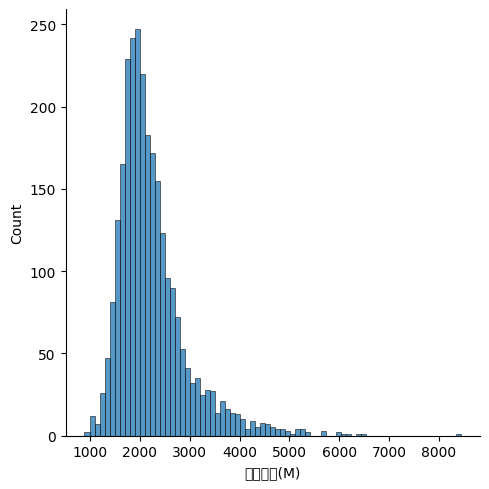

In [ ]:
plt.figure()
sns.displot(new_site_avg_df, x='이용거리(M)')
plt.show()

### 평균 이용거리 상위 rank data 추출

In [ ]:
#내림차순
new_site_avg_df_sort = new_site_avg_df.sort_values(by='이용거리(M)', ascending=False)
new_site_avg_df_sort.head(10)

,대여소번호,보관소(대여소)명,소재지(위치),상세주소,위도,경도,설치시기,거치대수,운영방식,이용거리(M)
1748,1858,500번·507번 버스 종점 앞,금천구,금천구 시흥동 1001-34,37.437271,126.902687,2018.10.15,NaN,LCD,8444.543545
2372,3627,압구정나들목,강남구,압구정동 507,37.530750,127.041603,2021.2.24,10.0,QR,6497.999531
1955,2037,동작역 5번출구 동작주차공원,동작구,서울특별시 동작구 현충로 지하 220,37.503189,126.977150,2017.5.12,NaN,LCD,6350.048976
327,565,옥수역 3번출구,성동구,서울특별시 성동구 옥수동 192-2,37.541367,127.017761,2016.7.6,19.0,QR,6217.677608
1948,2025,흑석역 1번출구,동작구,서울특별시 동작구 현충로 지하 90,37.509380,126.963615,2017.5.12,NaN,LCD,6089.759160
334,583,청계천 생태교실 앞,성동구,서울특별시 성동구 마장로39길 51 청계천 생태교실 앞,37.567970,127.046890,2016.7.6,5.0,LCD,5964.594943
1722,1827,독산보도육교 앞 자전거 보관소,금천구,서울특별시 금천구 서부샛길 70,37.456726,126.893066,2017.5.11,20.0,QR,5949.520098
220,836,현대자동차서비스 앞,용산구,서울특별시 용산구 원효로 74 현대자동차서비스 앞,37.531422,126.951500,2017.12.22,NaN,LCD,5702.970025
198,809,한남 유수지 복개주차장,용산구,서울특별시 용산구 독서당로 18 한남 유수지 복개주차장,37.530167,127.007439,2016.6.29,10.0,QR,5630.183753
2238,2301,현대고등학교 건너편,강남구,서울특별시 강남구 압구정로 134,37.524071,127.021790,2017.6.13,NaN,LCD,5625.661266


### 위경도 정보 시각화 & 상위 rank 위경도 표시

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50948 (\N{HANGUL SYLLABLE WI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44221 (\N{HANGUL SYLLABLE GYEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


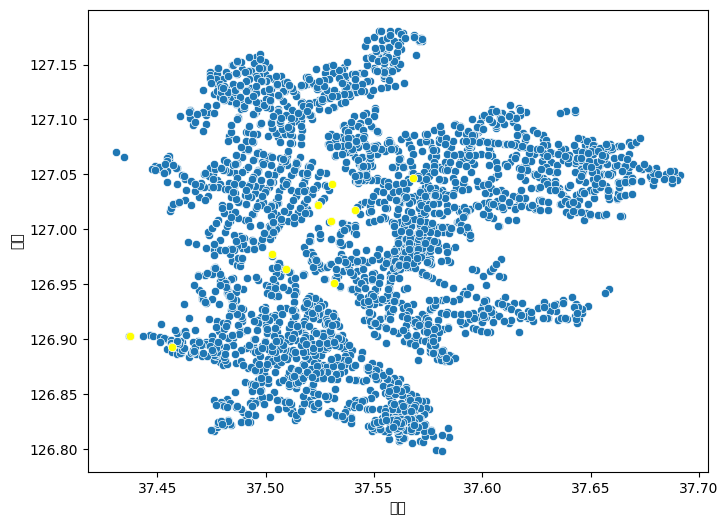

In [ ]:
plt.figure(figsize = (8,6))
sns.scatterplot(data = new_site_avg_df_sort, x = "위도", y = "경도") #위도가 가로, 경도가 세로
sns.scatterplot(data = new_site_avg_df_sort.loc[new_site_avg_df_sort.head(10).index, ], x = "위도", y = "경도", color = "yellow")
plt.show()

## 평균 사용시간이 높은 대여소는?

In [ ]:
site_time_avg_df = bike_usage_df_clean.groupby('대여 대여소번호')['이용시간(분)'].sum()/bike_usage_df_clean.groupby('대여 대여소번호')['이용시간(분)'].count()
new_site_time_avg_df = pd.merge(bike_site_df, site_time_avg_df, left_on = '대여소번호', right_on='대여 대여소번호' , how = 'left')
new_site_time_avg_df_sort = new_site_time_avg_df.sort_values(by='이용시간(분)', ascending=False)
new_site_time_avg_df_sort.head(10)

,대여소번호,보관소(대여소)명,소재지(위치),상세주소,위도,경도,설치시기,거치대수,운영방식,이용시간(분)
1748,1858,500번·507번 버스 종점 앞,금천구,금천구 시흥동 1001-34,37.437271,126.902687,2018.10.15,NaN,LCD,53.663636
1955,2037,동작역 5번출구 동작주차공원,동작구,서울특별시 동작구 현충로 지하 220,37.503189,126.977150,2017.5.12,NaN,LCD,49.921687
347,3552,서울숲 공영주차장앞,성동구,서울특별시 성동구 성수동1가 719,37.541958,127.042770,2020.4.13,19.0,QR,46.336420
1825,249,여의도중학교 옆,영등포구,서울특별시 영등포구 여의도동 8,37.524349,126.936119,2016.6.29,16.0,QR,43.718903
2372,3627,압구정나들목,강남구,압구정동 507,37.530750,127.041603,2021.2.24,10.0,QR,43.383413
2238,2301,현대고등학교 건너편,강남구,서울특별시 강남구 압구정로 134,37.524071,127.021790,2017.6.13,NaN,LCD,42.976982
1948,2025,흑석역 1번출구,동작구,서울특별시 동작구 현충로 지하 90,37.509380,126.963615,2017.5.12,NaN,LCD,41.026911
1722,1827,독산보도육교 앞 자전거 보관소,금천구,서울특별시 금천구 서부샛길 70,37.456726,126.893066,2017.5.11,20.0,QR,40.360636
327,565,옥수역 3번출구,성동구,서울특별시 성동구 옥수동 192-2,37.541367,127.017761,2016.7.6,19.0,QR,40.329829
1022,938,금암 문화공원,은평구,서울특별시 진관동 44-28 금암 문화공원,37.644684,126.918457,2017.11.1,NaN,LCD,40.145455


## 따릉이를 가장 많이 이용하는 연령대는?

In [ ]:
#size() 결측값 포함, count() 결측값 미포함
site_age_cnt_df = bike_usage_df_clean.groupby('연령대').size()
site_age_cnt_df

,0
연령대,
0,835
10,72647
20,638656
30,603786
40,346879
50,258379
60,97675
70,6995


In [ ]:
maxAge = site_age_cnt_df.idxmax()
maxCnt = site_age_cnt_df.max()
print(f'{maxAge}대 {maxCnt}건')

20대 638656건


## 지역구별로 이용건수가 많은 지역구는?

In [ ]:
site_cnt_df = bike_usage_df_clean.groupby('대여 대여소번호').size()
site_cnt_df = site_cnt_df.reset_index()
site_cnt_df.columns = ['대여 대여소번호', '이용건수']
site_cnt_df

,대여 대여소번호,이용건수
0,102,1880
1,103,1166
2,104,1034
3,105,518
4,106,1458
...,...,...
2709,5866,547
2710,6053,118
2711,6054,468
2712,9979,1


In [ ]:
new_site_cnt_df = pd.merge(bike_site_df, site_cnt_df, left_on = '대여소번호', right_on = '대여 대여소번호', how = 'left')
new_site_cnt_df

,대여소번호,보관소(대여소)명,소재지(위치),상세주소,위도,경도,설치시기,거치대수,운영방식,대여 대여소번호,이용건수
0,301,경복궁역 7번출구 앞,종로구,서울특별시 종로구 사직로 지하130 경복궁역 7번출구 앞,37.575794,126.971451,2015.10.7,20.0,QR,301.0,835.0
1,302,경복궁역 4번출구 뒤,종로구,서울특별시 종로구 사직로 지하130 경복궁역 4번출구 뒤,37.575947,126.974060,2015.10.7,12.0,QR,302.0,1243.0
2,303,광화문역 1번출구 앞,종로구,서울특별시 종로구 세종대로 지하189 세종로공원,37.571770,126.974663,2015.10.7,8.0,QR,303.0,1708.0
3,305,종로구청 옆,종로구,서울특별시 종로구 세종로 84-1,37.572559,126.978332,2015.1.7,16.0,QR,305.0,1263.0
4,307,서울역사박물관 앞,종로구,서울특별시 종로구 새문안로 55 서울역사박물관 앞,37.570000,126.971100,2015.10.7,11.0,QR,307.0,612.0
...,...,...,...,...,...,...,...,...,...,...,...
2744,3699,상일파출소 옆,강동구,강동구 상일동 520-1,37.556553,127.165878,2022.6.21,15.0,QR,3699.0,702.0
2745,3700,강변그대가리버뷰 입구 맞은편,강동구,강동구 천호동 250-7,37.548164,127.122574,2022.7.8,8.0,QR,3700.0,566.0
2746,3701,방아삼거리,강동구,강동구 둔촌동 118-2,37.523281,127.146133,2022.10.12,8.0,QR,3701.0,96.0
2747,4951,강동농협 버스정류소 앞(광채빌라),강동구,강동구 암사동 488-21,37.547966,127.135162,2022.9.29,5.0,QR,4951.0,477.0


In [ ]:
new_site_sum_cnt_df = new_site_cnt_df.groupby('소재지(위치)')['이용건수'].sum()
new_site_sum_cnt_df

,이용건수
소재지(위치),
강남구,62825.0
강동구,88452.0
강북구,31297.0
강서구,232636.0
관악구,50010.0
광진구,94590.0
구로구,78758.0
금천구,36426.0
노원구,118420.0


In [ ]:
new_site_sum_cnt_df = new_site_sum_cnt_df.sort_values(ascending=False)
new_site_sum_cnt_df

,이용건수
소재지(위치),
강서구,232636.0
송파구,187846.0
영등포구,163324.0
양천구,120619.0
노원구,118420.0
마포구,96292.0
광진구,94590.0
강동구,88452.0
성동구,82221.0


In [ ]:
bike_usage_df_clean

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간(분),이용거리(M),생년,성별,이용자종류,대여대여소ID,반납대여소ID,대여일자,대여시각,연령대
0,SPB-48918,2023-02-01 00:00:20,399,서울역 센트럴 자이아파트,0,2023-02-01 00:00:31,00399,서울역 센트럴 자이아파트,0,0,0.00,1982,M,내국인,ST-1436,ST-1436,2023-02-01,00,40
1,SPB-55589,2023-02-01 00:00:50,785,"양천구청, 보건소 사잇길",0,2023-02-01 00:00:58,00785,"양천구청, 보건소 사잇길",0,0,0.00,1999,\N,내국인,ST-2011,ST-2011,2023-02-01,00,20
2,SPB-56932,2023-02-01 00:00:02,367,독립문역 3-1번출구,0,2023-02-01 00:01:43,00348,독립문역 사거리,0,1,310.00,1976,\N,내국인,ST-180,ST-183,2023-02-01,00,40
3,SPB-51257,2023-02-01 00:01:58,4418,종암동 동덕여대 제2생활관 앞,0,2023-02-01 00:02:20,04418,종암동 동덕여대 제2생활관 앞,0,0,0.00,1998,M,내국인,ST-3046,ST-3046,2023-02-01,00,20
4,SPB-33873,2023-02-01 00:00:03,624,전농동 동아아파트 앞,0,2023-02-01 00:03:59,00657,동대문롯데캐슬아파트 앞,0,3,88.13,2005,M,내국인,ST-392,ST-1629,2023-02-01,00,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2300504,SPB-57275,2023-02-28 22:02:50,476,광희문,0,2023-03-01 04:47:28,00476,광희문,0,404,2490.00,1994,M,내국인,ST-1782,ST-1782,2023-02-28,22,30
2300505,SPB-57806,2023-02-28 22:11:15,3414,종로5가역 4번출구,0,2023-03-01 05:28:21,03415,동대문역6번출구,0,437,810.00,1998,M,내국인,ST-1811,ST-1812,2023-02-28,22,20
2300506,SPB-41037,2023-02-28 22:53:37,468,웨스틴 조선호텔,0,2023-03-01 07:14:52,00819,선린인터넷 고등학교,0,501,7041.95,1975,M,내국인,ST-1774,ST-438,2023-02-28,22,40
2300509,SPB-43292,2023-02-28 22:35:26,2421,신논현역 4번출구,0,2023-03-01 08:03:22,02381,언주역 6번출구앞,0,567,2581.07,1996,M,내국인,ST-1887,ST-1246,2023-02-28,22,20


## 주말 오후(12시~18시)에 가장 많은 이용건수 지역구는?

In [ ]:
bike_usage_df_clean['대여시각'] = bike_usage_df_clean['대여시각'].apply(lambda x: x.split(":")[0])
bike_usage_df_clean['대여시각'] = bike_usage_df_clean['대여시각'].astype('int')

In [ ]:
new_bike_usage_df_clean = bike_usage_df_clean.loc[(bike_usage_df_clean['대여시각'] > 12) & (bike_usage_df_clean['대여시각'] < 18),].groupby('대여 대여소번호').size()
new_bike_usage_df_clean = new_bike_usage_df_clean.reset_index()
new_bike_usage_df_clean.columns = ['대여 대여소번호', '이용건수']
new_bike_usage_df_clean

,대여 대여소번호,이용건수
0,102,581
1,103,397
2,104,324
3,105,155
4,106,489
...,...,...
2708,5866,161
2709,6053,54
2710,6054,116
2711,9979,1


In [ ]:
new_bike_usage_df_clean_merge = pd.merge(bike_site_df, new_bike_usage_df_clean, left_on = '대여소번호', right_on = '대여 대여소번호', how = 'left')
new_bike_usage_df_clean_merge

,대여소번호,보관소(대여소)명,소재지(위치),상세주소,위도,경도,설치시기,거치대수,운영방식,대여 대여소번호,이용건수
0,301,경복궁역 7번출구 앞,종로구,서울특별시 종로구 사직로 지하130 경복궁역 7번출구 앞,37.575794,126.971451,2015.10.7,20.0,QR,301.0,248.0
1,302,경복궁역 4번출구 뒤,종로구,서울특별시 종로구 사직로 지하130 경복궁역 4번출구 뒤,37.575947,126.974060,2015.10.7,12.0,QR,302.0,427.0
2,303,광화문역 1번출구 앞,종로구,서울특별시 종로구 세종대로 지하189 세종로공원,37.571770,126.974663,2015.10.7,8.0,QR,303.0,496.0
3,305,종로구청 옆,종로구,서울특별시 종로구 세종로 84-1,37.572559,126.978332,2015.1.7,16.0,QR,305.0,464.0
4,307,서울역사박물관 앞,종로구,서울특별시 종로구 새문안로 55 서울역사박물관 앞,37.570000,126.971100,2015.10.7,11.0,QR,307.0,194.0
...,...,...,...,...,...,...,...,...,...,...,...
2744,3699,상일파출소 옆,강동구,강동구 상일동 520-1,37.556553,127.165878,2022.6.21,15.0,QR,3699.0,173.0
2745,3700,강변그대가리버뷰 입구 맞은편,강동구,강동구 천호동 250-7,37.548164,127.122574,2022.7.8,8.0,QR,3700.0,177.0
2746,3701,방아삼거리,강동구,강동구 둔촌동 118-2,37.523281,127.146133,2022.10.12,8.0,QR,3701.0,32.0
2747,4951,강동농협 버스정류소 앞(광채빌라),강동구,강동구 암사동 488-21,37.547966,127.135162,2022.9.29,5.0,QR,4951.0,102.0


In [ ]:
new_bike_usage_df_clean_merge_sum = new_bike_usage_df_clean_merge.groupby('소재지(위치)')['이용건수'].sum()
new_bike_usage_df_clean_merge_sum.reset_index()
new_bike_usage_df_clean_merge_sum = new_bike_usage_df_clean_merge_sum.sort_values(ascending=False)
new_bike_usage_df_clean_merge_sum

,이용건수
소재지(위치),
강서구,66031.0
송파구,55942.0
영등포구,48009.0
노원구,38416.0
양천구,36416.0
마포구,30858.0
광진구,26076.0
강동구,25863.0
성동구,25312.0
